<a href="https://colab.research.google.com/github/piziomo/Data-Science-GenAI-ML-Projects/blob/main/Financial%20Analysis%20(Forage)/Financial_Analysis_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/sample_data/Files/top_companies_earnings.csv')

In [ ]:
df.head()

,ID,Company_name,Year,total_revenue,net_income,total_assets,total_liabilities,cash_flow
0,1,Microsoft,2022,198270,72738,364840,198298,13931
1,2,Tesla,2022,81462,12487,82338,36440,16924
2,3,Apple,2022,394328,99803,352755,302083,35929
3,4,Microsoft,2023,211915,72361,411976,205753,34704
4,5,Tesla,2023,96773,14974,106618,43009,17189


In [ ]:
df['Revenue Growth (%)'] = df.groupby(['Company_name'])['total_revenue'].pct_change() * 100

In [ ]:
df.head(10)

,ID,Company_name,Year,total_revenue,net_income,total_assets,total_liabilities,cash_flow,Revenue Growth (%)
0,1,Microsoft,2022,198270,72738,364840,198298,13931,NaN
1,2,Tesla,2022,81462,12487,82338,36440,16924,NaN
2,3,Apple,2022,394328,99803,352755,302083,35929,NaN
3,4,Microsoft,2023,211915,72361,411976,205753,34704,6.882030
4,5,Tesla,2023,96773,14974,106618,43009,17189,18.795267
5,6,Apple,2023,383285,96995,352583,290437,24977,-2.800461
6,7,Microsoft,2024,245122,88136,512163,243686,18315,15.669962
7,8,Tesla,2024,97690,7153,122070,48390,17037,0.947578
8,9,Apple,2024,391035,93736,364980,308030,30737,2.021994


In [ ]:
df['Net Income Growth (%)'] = df.groupby(['Company_name'])['net_income'].pct_change() * 100

In [ ]:
df.head()

,ID,Company_name,Year,total_revenue,net_income,total_assets,total_liabilities,cash_flow,Revenue Growth (%),Net Income Growth (%)
0,1,Microsoft,2022,198270,72738,364840,198298,13931,NaN,NaN
1,2,Tesla,2022,81462,12487,82338,36440,16924,NaN,NaN
2,3,Apple,2022,394328,99803,352755,302083,35929,NaN,NaN
3,4,Microsoft,2023,211915,72361,411976,205753,34704,6.882030,-0.518299
4,5,Tesla,2023,96773,14974,106618,43009,17189,18.795267,19.916713


In [ ]:
df['Total Assets Growth (%)'] = df.groupby(['Company_name'])['total_assets'].pct_change() * 100

In [ ]:
df['Total Liabilities Growth (%)'] = df.groupby(['Company_name'])['total_liabilities'].pct_change() * 100

In [ ]:
df['CashFlow Growth (%)'] = df.groupby(['Company_name'])['cash_flow'].pct_change() * 100

In [ ]:
df.head()

,ID,Company_name,Year,total_revenue,net_income,total_assets,total_liabilities,cash_flow,Revenue Growth (%),Net Income Growth (%),Total Assets Growth (%),Total Liabilities Growth (%),CashFlow Growth (%)
0,1,Microsoft,2022,198270,72738,364840,198298,13931,NaN,NaN,NaN,NaN,NaN
1,2,Tesla,2022,81462,12487,82338,36440,16924,NaN,NaN,NaN,NaN,NaN
2,3,Apple,2022,394328,99803,352755,302083,35929,NaN,NaN,NaN,NaN,NaN
3,4,Microsoft,2023,211915,72361,411976,205753,34704,6.882030,-0.518299,12.919636,3.759493,149.113488
4,5,Tesla,2023,96773,14974,106618,43009,17189,18.795267,19.916713,29.488207,18.026894,1.565824


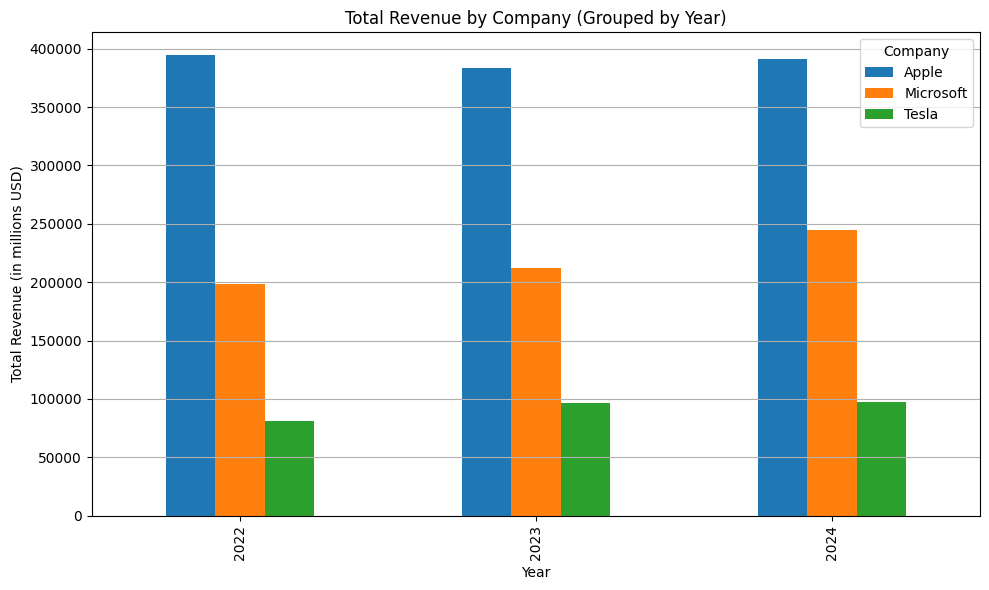

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Pivot the data to format for grouped bar chart
pivot_df = df.pivot(index='Year', columns='Company_name', values='total_revenue')

# Plot grouped bar chart
pivot_df.plot(kind='bar', figsize=(10, 6))
plt.title('Total Revenue by Company (Grouped by Year)')
plt.xlabel('Year')
plt.ylabel('Total Revenue (in millions USD)')
plt.legend(title='Company')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

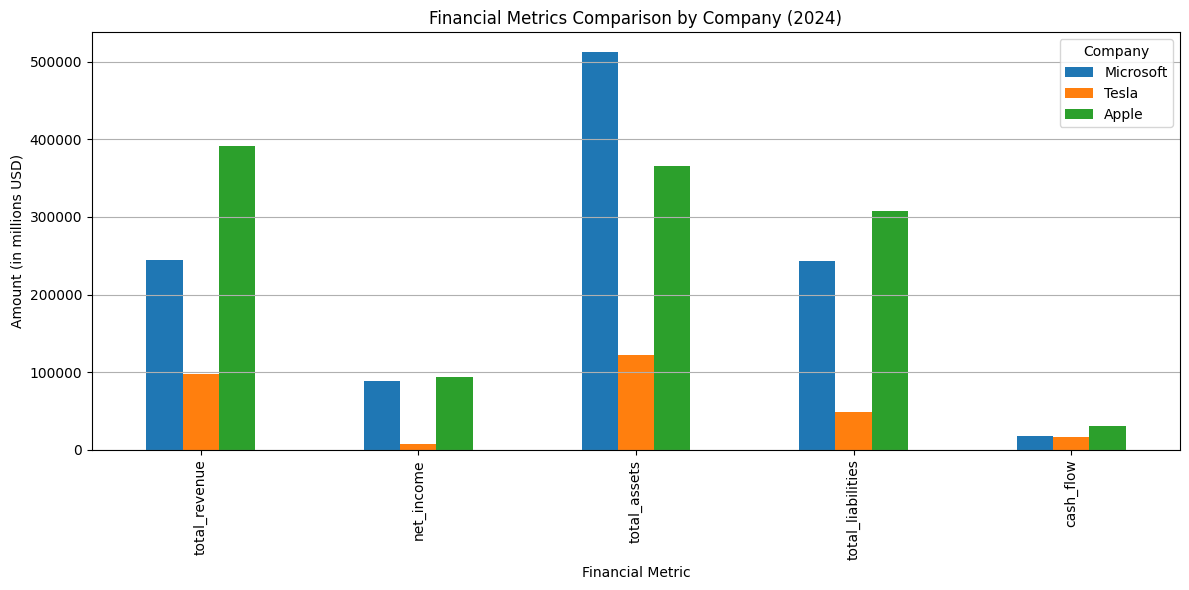

In [ ]:
# Define the financial metrics to compare
metrics = ['total_revenue', 'net_income', 'total_assets', 'total_liabilities', 'cash_flow']

# Filter for the latest year
latest_year = df['Year'].max()
latest_df = df[df['Year'] == latest_year]

# Set company name as index and select only the relevant columns
latest_metrics_df = latest_df.set_index('Company_name')[metrics]

# Transpose the DataFrame for plotting: metrics on x-axis, companies as grouped bars
plot_df = latest_metrics_df.T

# Plot grouped bar chart
plot_df.plot(kind='bar', figsize=(12, 6))
plt.title(f'Financial Metrics Comparison by Company ({latest_year})')
plt.xlabel('Financial Metric')
plt.ylabel('Amount (in millions USD)')
plt.grid(axis='y')
plt.legend(title='Company')
plt.tight_layout()
plt.show()

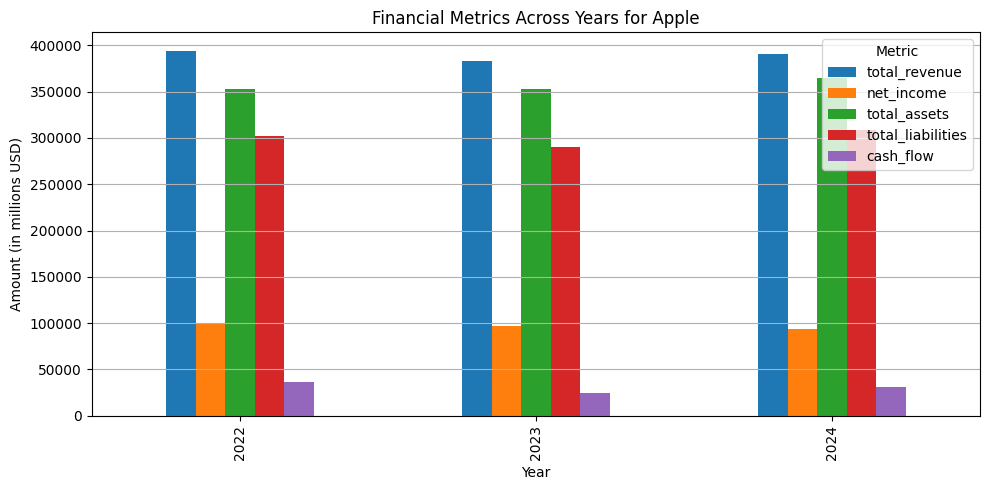

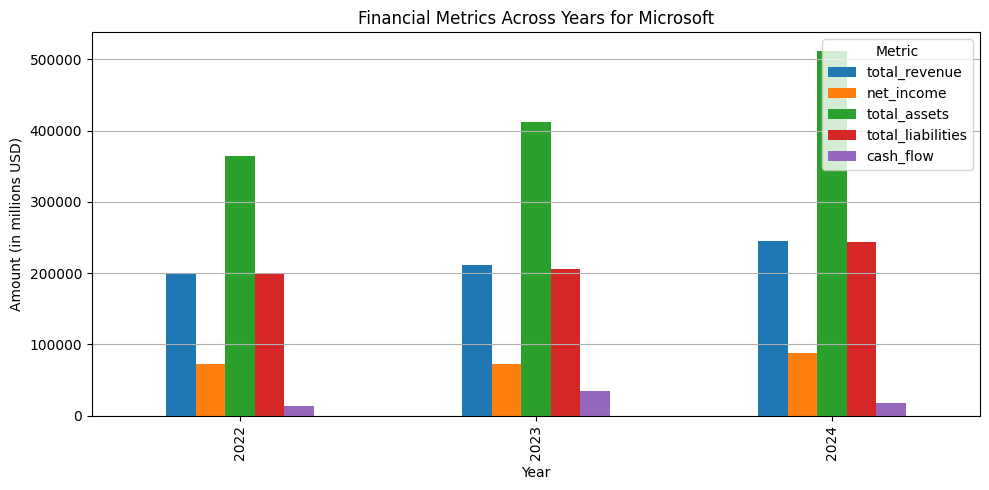

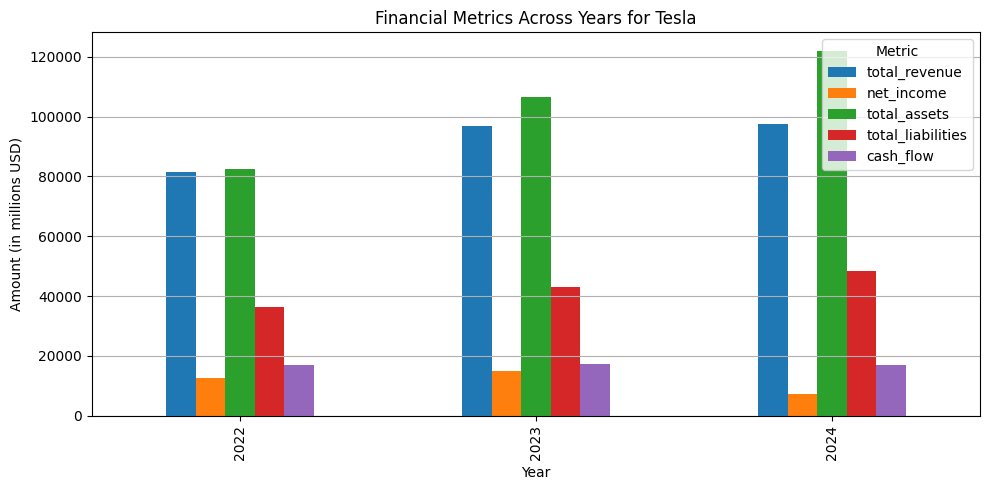

In [ ]:
# Define the financial metrics to plot
metrics = ['total_revenue', 'net_income', 'total_assets', 'total_liabilities', 'cash_flow']

# Iterate over each company
for company, company_df in df.groupby('Company_name'):
    # Pivot: index → Year, columns → metrics, values → metric values
    pivot = company_df.pivot(index='Year', columns='Company_name', values=metrics)
    # alternatively, simpler:
    pivot = company_df.set_index('Year')[metrics]

    # Plot grouped bar chart for the company across years
    pivot.plot(kind='bar', figsize=(10, 5))
    plt.title(f'Financial Metrics Across Years for {company}')
    plt.xlabel('Year')
    plt.ylabel('Amount (in millions USD)')
    plt.grid(axis='y')
    plt.legend(title='Metric')
    plt.tight_layout()
    plt.show()

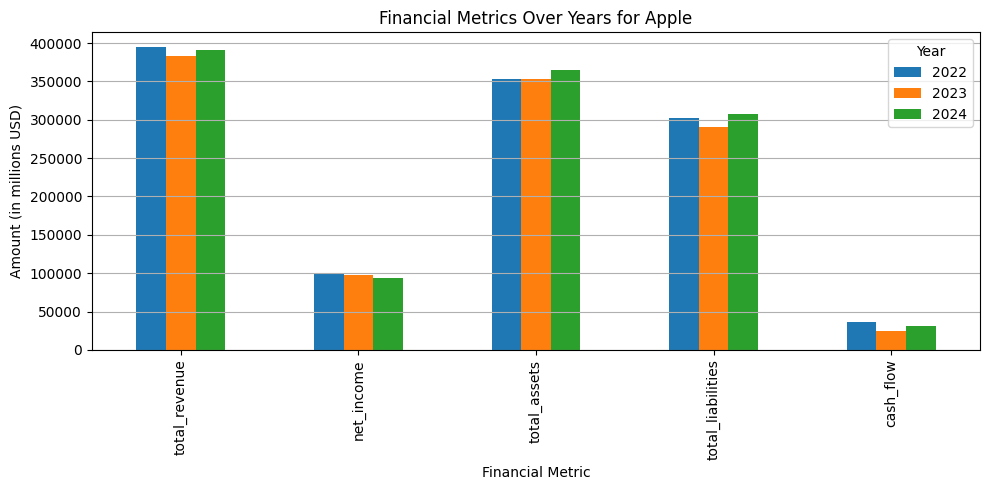

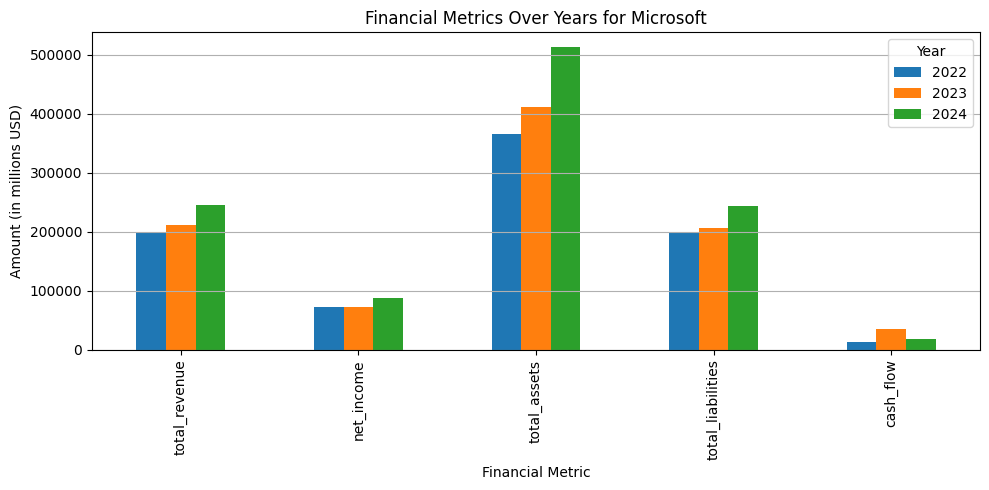

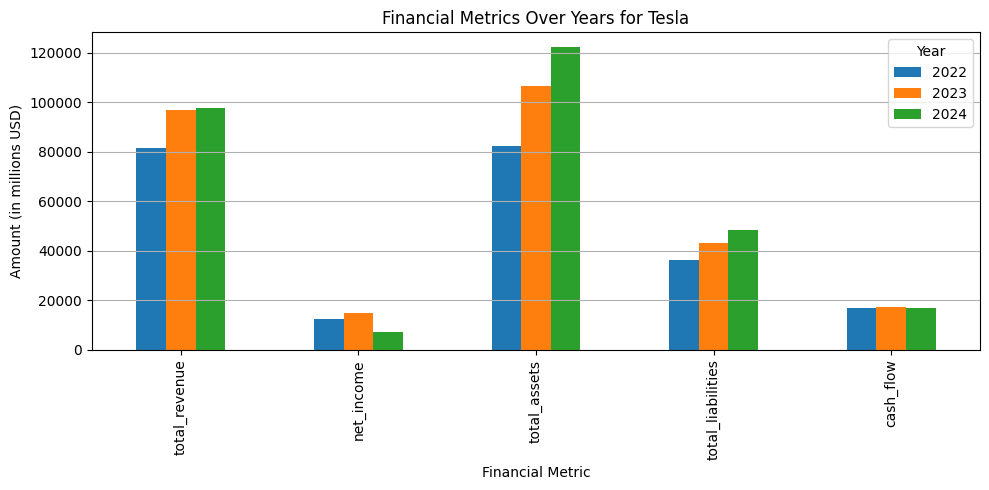

In [ ]:
# Define the financial metrics
metrics = ['total_revenue', 'net_income', 'total_assets', 'total_liabilities', 'cash_flow']

# Generate grouped bar charts for each company
for company, company_df in df.groupby('Company_name'):
    # Set Year as index and select financial metrics
    company_metrics = company_df.set_index('Year')[metrics]

    # Transpose to have metrics on x-axis and years as grouped bars
    transposed = company_metrics.T

    # Plot
    transposed.plot(kind='bar', figsize=(10, 5))
    plt.title(f'Financial Metrics Over Years for {company}')
    plt.xlabel('Financial Metric')
    plt.ylabel('Amount (in millions USD)')
    plt.grid(axis='y')
    plt.legend(title='Year')
    plt.tight_layout()
    plt.show()

**Conclusion: Financial Trend Analysis of Top Companies (2022–2024)**
This analysis provides a comparative overview of financial performance metrics for Apple, Microsoft, and Tesla over the last three fiscal years. Using grouped bar charts and calculated growth rates, we observe the following:

**Revenue Trends**
- Tesla demonstrated the highest revenue growth rate in 2023 (18.8%) but plateaued in 2024 (+0.9%).

- Microsoft showed steady revenue growth, reaching a notable 15.7% increase in 2024.

- Apple's revenue declined slightly in 2023 (−2.8%) but rebounded modestly in 2024 (+2.0%).

**Net Income Trends**
- Microsoft's net income dipped slightly in 2023 but rebounded sharply in 2024 (+21.8%).

- Tesla's net income dropped significantly in 2024 (−52.2%), indicating profit compression despite flat revenue.

- Apple's net income trended downward across both years, suggesting margin pressure or cost increases.

**Asset and Liability Changes**
All three companies expanded total assets, with Microsoft having the most aggressive asset growth.

- Liabilities rose across the board, particularly for Microsoft and Tesla, which may indicate increased leverage or expansion funding.

- Cash Flow Highlights
Microsoft and Apple maintained strong cash flows, although Apple’s cash flow dropped significantly in 2024.

- Tesla’s cash flow remained relatively stable but did not match the scale of its asset or revenue changes.

**Final Insights**
- Microsoft appears to be the most financially balanced, with strong revenue and income growth supported by expanding assets and cash flow.

- Apple shows signs of stabilization after a weak 2023, though its income and cash flow still declined.

- Tesla’s performance is volatile, with strong early growth followed by stagnating revenue and declining profitability in 2024.